# Ex 1 - Image Analysis Introduction

In [6]:
import os
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

# You may need ipympl: pip install ipympl
# %matplotlib widget
# %matplotlib nbagg

## Ex 1

In [7]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated  by "+" to give the full path to the image.
im_org = io.imread(os.path.join(in_dir, im_name))

## Ex 2 and 3

In [8]:
print(im_org.shape)
print(im_org.dtype)

(512, 512)
uint8


## Ex 4

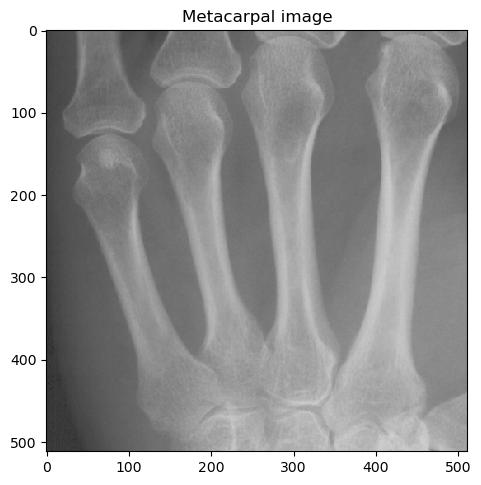

In [9]:
io.imshow(im_org)
plt.title("Metacarpal image")
io.show()

## Ex 5

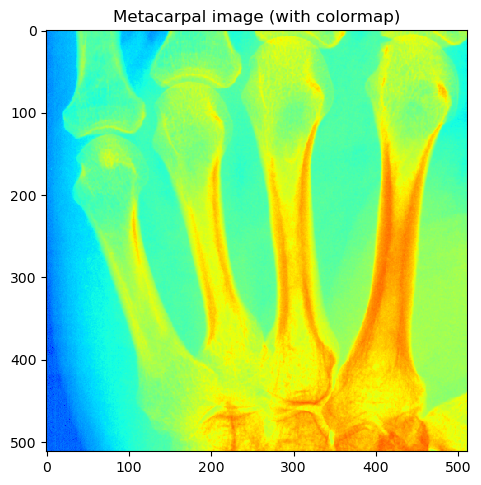

In [10]:
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
io.show()

## Ex 6

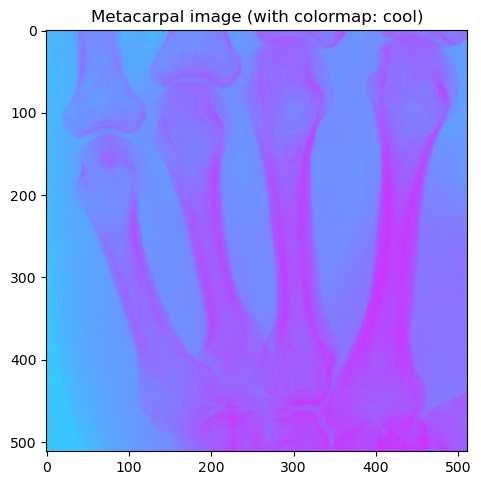

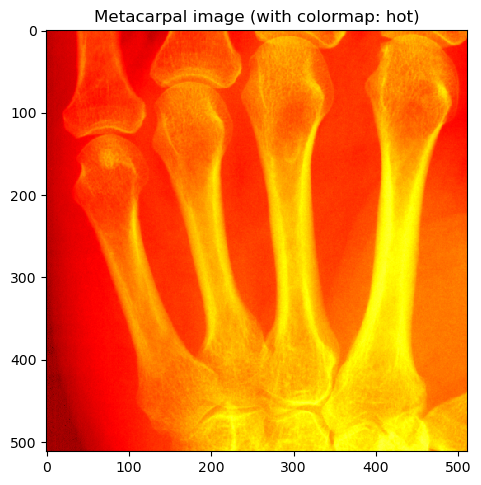

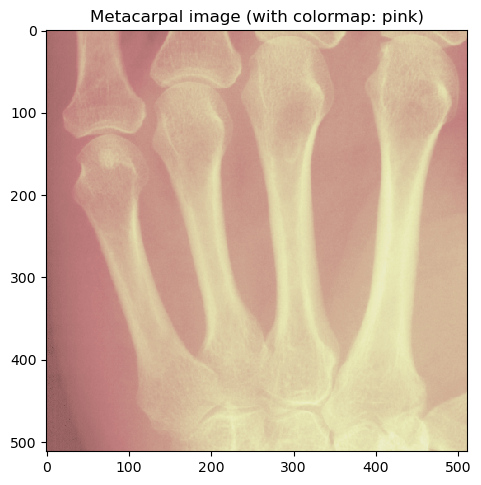

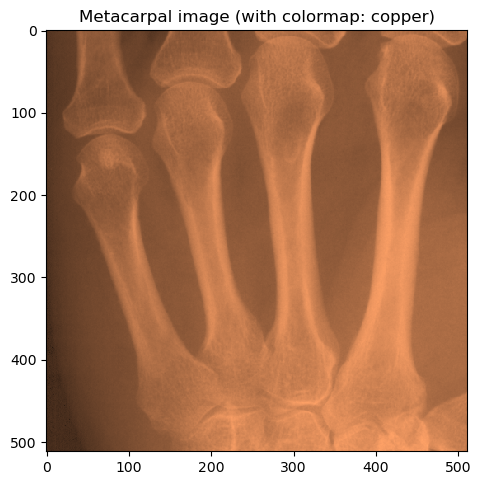

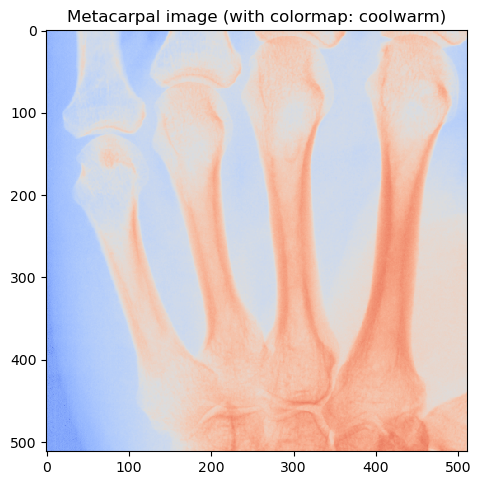

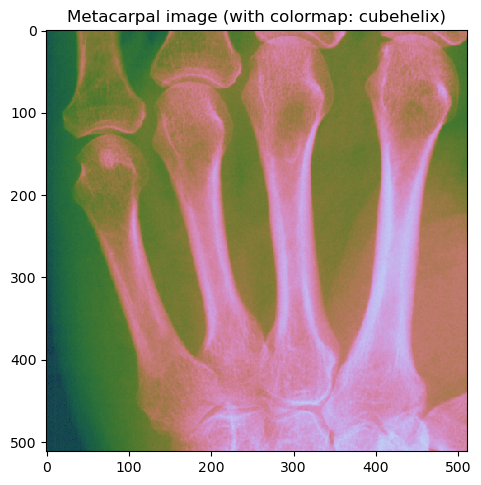

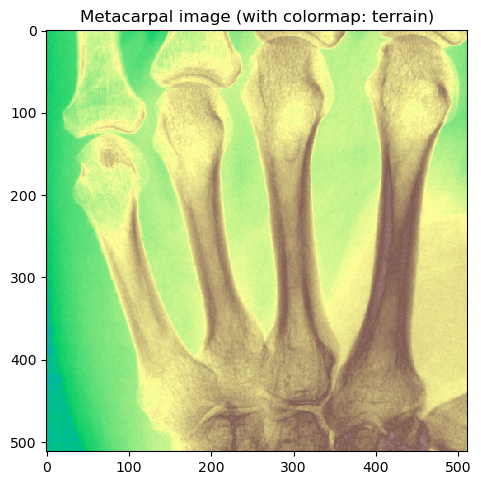

In [11]:
# Experiment with different colormaps. For example cool, hot, pink, copper, coolwarm, cubehelix, and terrain.

colormaps = ["cool", "hot", "pink", "copper", "coolwarm", "cubehelix", "terrain"]

for cmap in colormaps:
    io.imshow(im_org, cmap=cmap)
    plt.title('Metacarpal image (with colormap: {})'.format(cmap))
    io.show()

## Ex 7

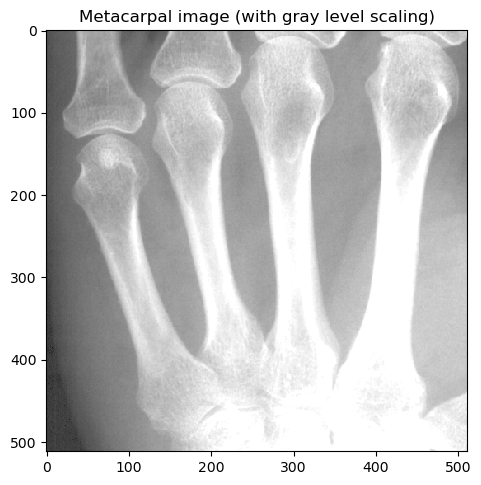

In [12]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

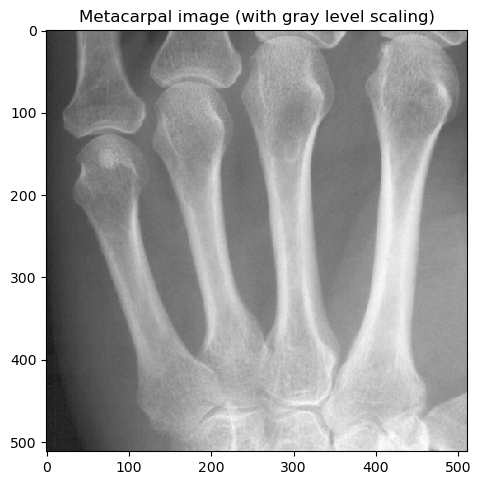

In [13]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray level scaling)')
io.show()

## Ex 8

In [14]:
nbins = 256
%matplotlib inline

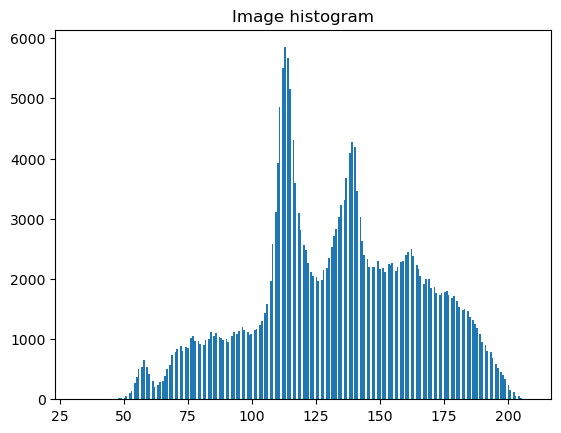

In [15]:
plt.hist(im_org.ravel(), bins=nbins)
plt.title('Image histogram')
io.show()

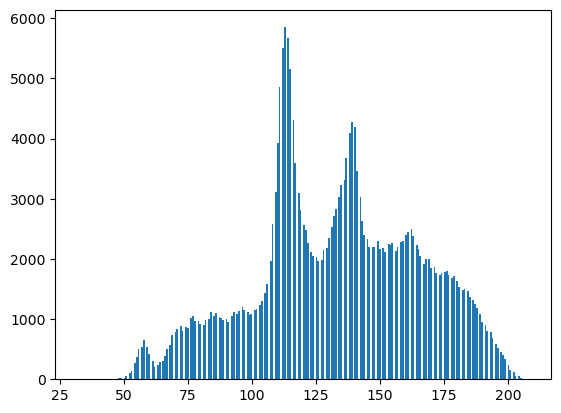

In [16]:
h = plt.hist(im_org.ravel(), bins=nbins)

In [17]:
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 1147.0 pixel values in bin 100


In [18]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


Max count: 5848.0 at: 117


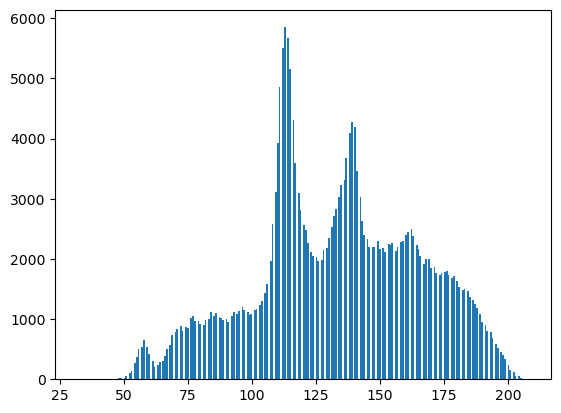

In [19]:
# Since the number of bins match the number of different intensities in the image, it may be confusing.
# Max_at represent the bin number, not the most common intensity (although in this case change).
y, x, _ = plt.hist(im_org.ravel(), bins=nbins)
max_count = y.max()
max_at = y.argmax()
print(f"Max count: {max_count} at: {max_at}")

## Ex 9

In [20]:
# Rather than the position of the maximum count, I want to know the most common range of intensities
bin_left = h[1][max_at]
bin_right = h[1][max_at + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 112.4375 to 113.125


## Ex 10

In [21]:
r = 100
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")


The pixel value at (r,c) = (100, 90) is: 119


## Ex 11

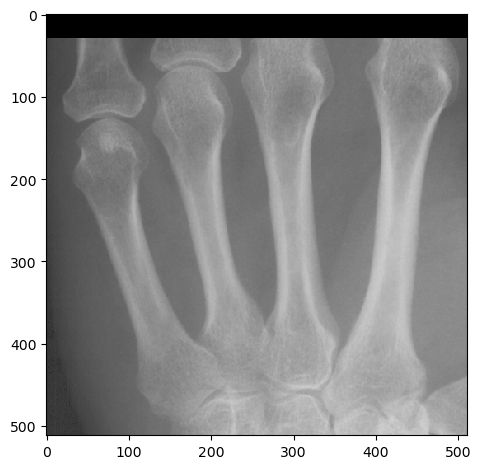

In [22]:
im_org[:30] = 0
io.imshow(im_org)
io.show()


## Ex 12

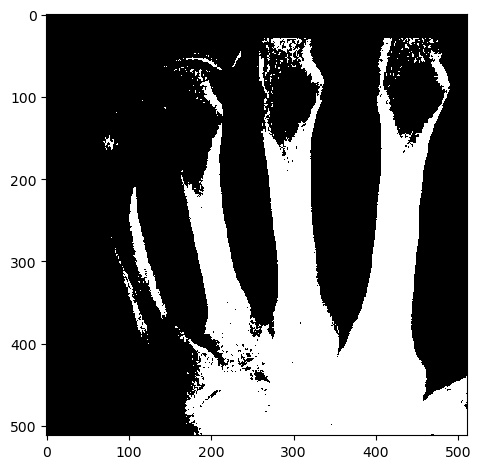

In [23]:
mask = im_org > 150
io.imshow(mask)
io.show()


## Ex 13

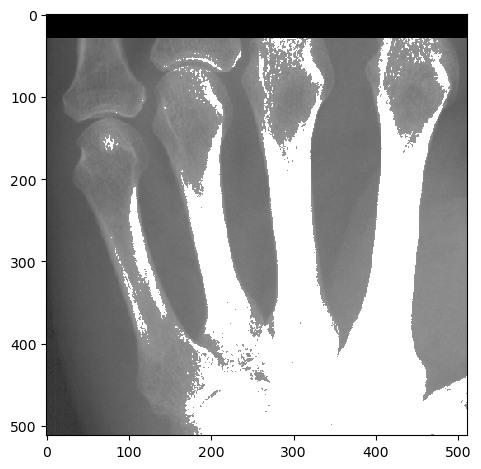

In [24]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

## Ex 14

(600, 800, 3)
uint8


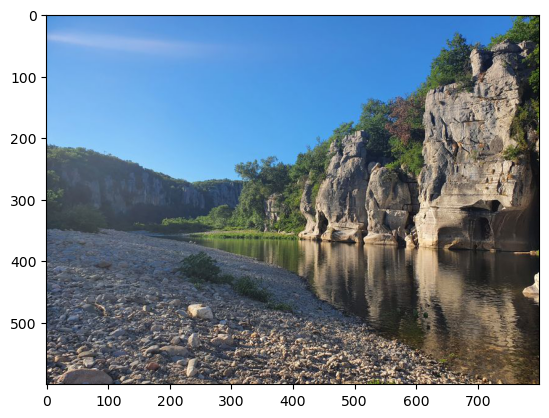

In [25]:
im = io.imread(in_dir + 'ardeche.jpg')
print(im.shape)
print(im.dtype)
plt.imshow(im)
plt.show()

## Ex 15

In [26]:
r = 110
c = 90
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im[r, c, :]}")

The pixel value at (r,c) = (110, 90) is: [119 178 238]


## Ex 16

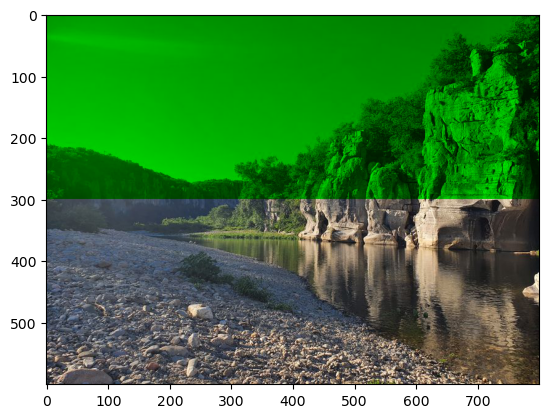

In [27]:
r_2, _, _ = np.array(im.shape) // 2
im[:r_2, :, [0,2]] = 0
plt.imshow(im)
plt.show()

## Ex 17

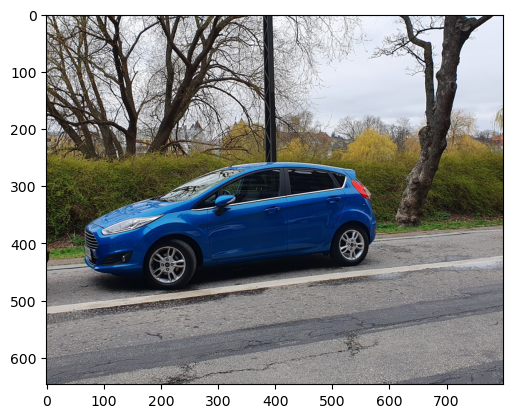

In [28]:
im_org = io.imread(in_dir + 'car.png')
plt.imshow(im_org)
plt.show()

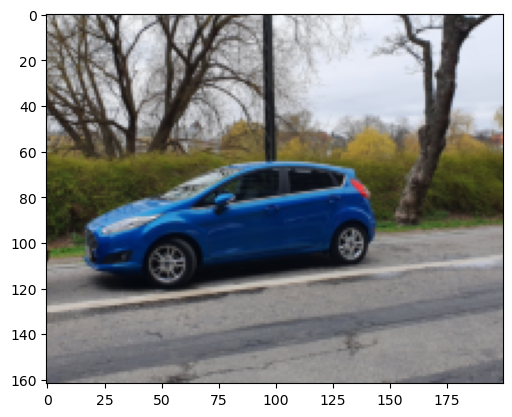

In [29]:
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True, channel_axis=2)
plt.imshow(image_rescaled)
plt.show()



## Ex 18

In [30]:
print(image_rescaled.dtype)
print(image_rescaled.dtype)
print(image_rescaled.max())
print(image_rescaled.min())

float64
float64
0.9933274669865821
0.003037670421336431


## Ex 19

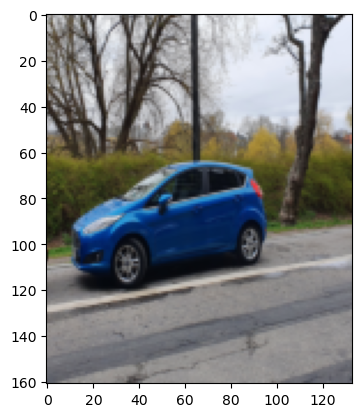

In [31]:
image_resized = resize(im_org, (im_org.shape[0] // 4, im_org.shape[1] // 6), anti_aliasing=True)
plt.imshow(image_resized)
plt.show()

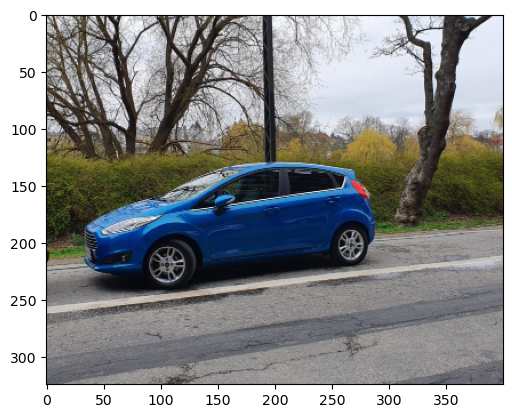

In [32]:
_, c, _ = im_org.shape
rescale_factor = 1 / (c / 400)

image_rescaled = rescale(im_org, rescale_factor, anti_aliasing=True, channel_axis=2)
plt.imshow(image_rescaled)
plt.show()

In [33]:
print(image_rescaled.shape)

(324, 400, 3)


## Ex 20

In [34]:
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray)

## Ex 21

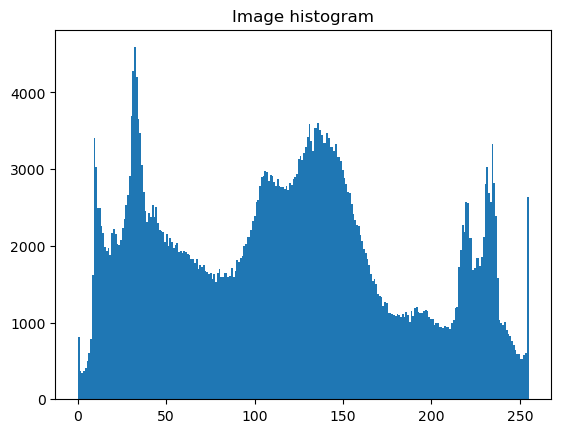

In [35]:
plt.hist(im_byte.ravel(), bins=nbins)
plt.title('Image histogram')
io.show()

## Ex 20

## Ex 21

## Ex 22 and 23

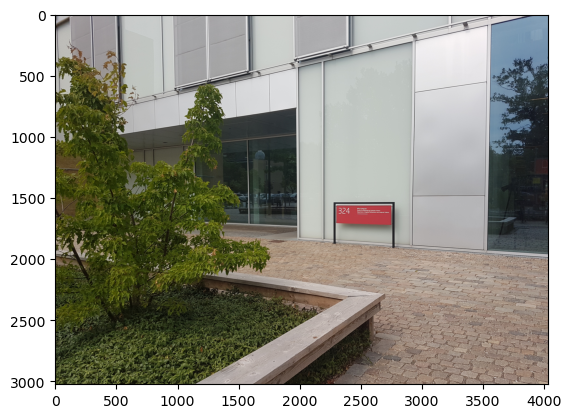

In [36]:
im_org = io.imread(in_dir + 'DTUSign1.jpg')
plt.imshow(im_org)
plt.show()

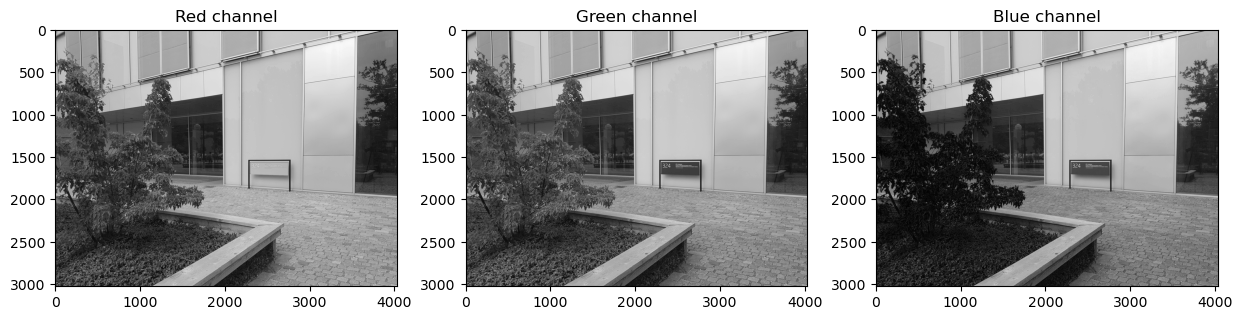

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,10))
ax[0].imshow(im_org[:,:,0], cmap = 'gray')
ax[0].set_title('Red channel')
ax[1].imshow(im_org[:,:,1], cmap = 'gray')
ax[1].set_title('Green channel')
ax[2].imshow(im_org[:,:,2], cmap = 'gray')
ax[2].set_title('Blue channel')
plt.show()

## Ex 24

In [38]:
out_dir = 'results/'
im_org[500:1000, 800:1500, :] = 0

## Ex 25

In [40]:
io.imsave(out_dir + 'DTUSign1-marked.jpg', im_org)
io.imsave(out_dir + 'DTUSign1-marked.png', im_org)
io.imsave(out_dir + 'DTUSign1-marked.tif', im_org)

## Ex 26

In [41]:
im_org = io.imread(in_dir + 'DTUSign1.jpg')
im_copy = im_org.copy()
im_copy[1500:2000, 2000:3000, :] = 0
im_copy[1500:2000, 2000:3000, 2] = 255
im_copy[1505:1995, 2005:2995, :] = im_org[1505:1995, 2005:2995, :]

io.imsave(out_dir + 'DTUSign1-marked_blue.jpg', im_copy)

## Ex 27

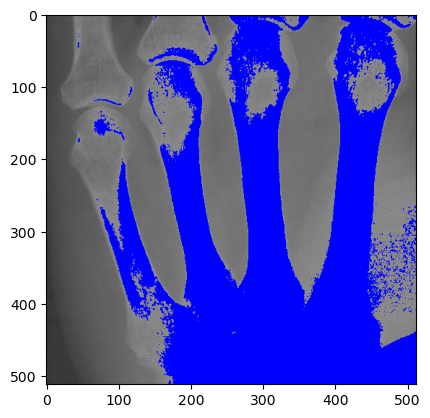

In [42]:
im_org = io.imread(in_dir + 'metacarpals.png')

mask = im_org > 140
im_rgb = color.gray2rgb(im_org)
im_rgb[mask, 0] = 0
im_rgb[mask, 1] = 0
im_rgb[mask, 2] = 255

plt.imshow(im_rgb)
io.show()

## Ex 28

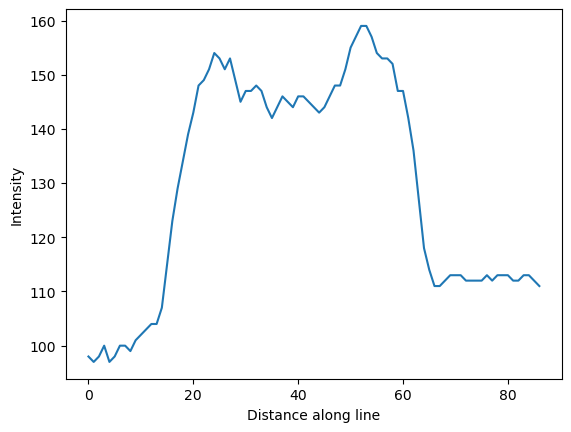

In [43]:
im_org = io.imread(in_dir + 'metacarpals.png')
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

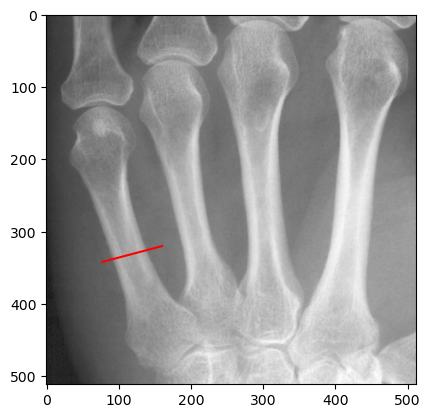

In [44]:
plt.imshow(im_org, cmap = 'gray')
plt.plot([77, 160], [342, 320], c = 'r')
io.show()

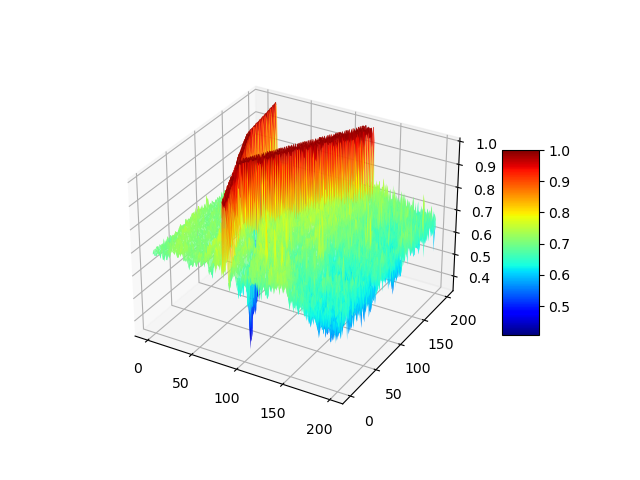

In [45]:
%matplotlib widget

in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Ex 29

In [46]:
%matplotlib inline

in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

## Ex 29

In [47]:
im = ds.pixel_array

## Ex 30

In [48]:
print(im.shape)
print(im.dtype)

(512, 512)
int16


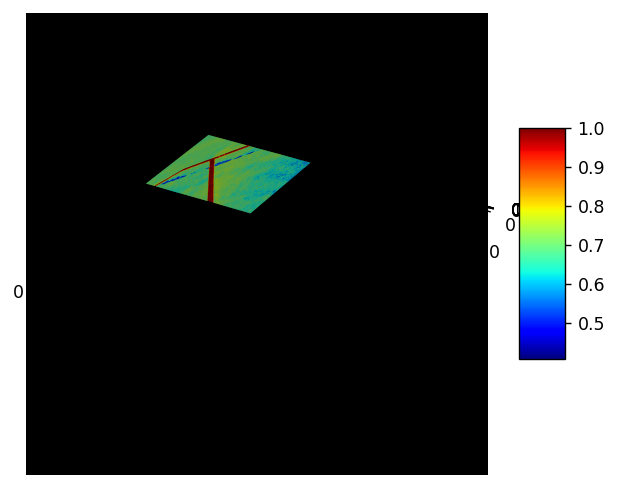

In [49]:
plt.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
plt.show()